In [1]:
import pickle

pickle_file = '-images.pickle'

with open(pickle_file, 'rb') as f:
    save = pickle.load(f)
    X_train = save['X_train']
    y_train = save['y_train']
    X_test = save['X_test']
    y_test = save['y_test']
    del save  # hint to help gc free up memory
    print('Training set', X_train.shape, y_train.shape)
    print('Test set', X_test.shape, y_test.shape)

('Training set', (3500, 64, 64), (3500, 1))
('Test set', (1500, 64, 64), (1500, 1))


In [2]:
# Add additional imports
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from keras.callbacks import ModelCheckpoint

from keras.datasets import mnist

print "using ordering:", K.image_dim_ordering()

Using Theano backend.


using ordering: th


In [3]:
# number of classes
num_classes = np.max(y_train) + 1 # number of categories

# image dimensions
img_rows, img_cols = X_train.shape[1],  X_train.shape[2]

if K.image_dim_ordering() == 'th':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

Y_train = np_utils.to_categorical(y_train, num_classes)
Y_test = np_utils.to_categorical(y_test, num_classes)

print X_train.shape
print y_train.shape

(3500, 1, 64, 64)
(3500, 1)


(64, 64)
(3500, 1)


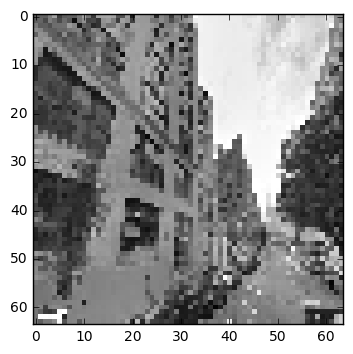

In [4]:
# Plot to make sure we have imported correctly..
%matplotlib inline
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

img_num = 0

if K.image_dim_ordering() == 'th':
    img = X_train[img_num][0,:,:]
else:
    img = X_train[img_num][:,:,0]

print img.shape
print y_train.shape
imshow(img, cmap = plt.get_cmap('gray'), vmin = 0, vmax = 1,  interpolation='nearest')

In [5]:
## Construct CNN

# model hyperparameters
batch_size = 32
nb_epoch = 10

# network architecture
patch_size_1 = 3
patch_size_2 = 3
patch_size_3 = 3
patch_size_4 = 3
patch_size_5 = 3

depth_1 = 64
depth_2 = 128
depth_3 = 128
depth_4 = 256
depth_5 = 256

pool_size = 2

num_hidden_1 = 512
num_hidden_2 = 1024

dropout = 0.25


##---------------------------
# create new Keras Sequential model
model = Sequential()

model.add(Convolution2D(depth_1, patch_size_1, patch_size_1,
                        border_mode='valid',
                        input_shape=input_shape))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

model.add(Convolution2D(depth_2, patch_size_2, patch_size_2,
                        border_mode='valid'))
model.add(Activation('relu'))
model.add(Convolution2D(depth_3, patch_size_3, patch_size_3,
                        border_mode='valid'))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

model.add(Convolution2D(depth_4, patch_size_4, patch_size_4,
                        border_mode='valid'))
model.add(Activation('relu'))
model.add(Convolution2D(depth_5, patch_size_5, patch_size_5,
                        border_mode='valid'))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))


model.add(Flatten())

model.add(Dense(num_hidden_1))
model.add(Activation('relu'))
model.add(Dropout(dropout))

model.add(Dense(num_hidden_2))
model.add(Activation('relu'))
model.add(Dropout(dropout))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

print "Model Created"

##-------------------------------------------
# compile model
checkpoint_name = "-model.hdf5"
checkpointer = ModelCheckpoint(checkpoint_name, verbose=0, save_best_only=True)

model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

print "Compiled.."

Model Created
Compiled..


In [6]:
# Train Model
history = model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch,
          verbose=1, validation_data=(X_test, Y_test), callbacks=[checkpointer])

Train on 3500 samples, validate on 1500 samples
Epoch 1/10
3500/3500 [==============================] - 435s - loss: 1.5672 - acc: 0.3551 - val_loss: 1.5675 - val_acc: 0.3573
Epoch 2/10
3500/3500 [==============================] - 299s - loss: 1.5472 - acc: 0.3623 - val_loss: 1.5459 - val_acc: 0.3573
Epoch 3/10
3500/3500 [==============================] - 176s - loss: 1.5413 - acc: 0.3609 - val_loss: 1.5568 - val_acc: 0.3573
Epoch 4/10
3500/3500 [==============================] - 180s - loss: 1.5354 - acc: 0.3657 - val_loss: 1.5468 - val_acc: 0.3573
Epoch 5/10
3500/3500 [==============================] - 173s - loss: 1.5325 - acc: 0.3657 - val_loss: 1.5447 - val_acc: 0.3573
Epoch 6/10
3500/3500 [==============================] - 180s - loss: 1.5301 - acc: 0.3657 - val_loss: 1.5403 - val_acc: 0.3573
Epoch 7/10
3500/3500 [==============================] - 221s - loss: 1.5225 - acc: 0.3623 - val_loss: 1.5399 - val_acc: 0.3573
Epoch 8/10
3500/3500 [==============================] - 183s - 

In [7]:
# Test the Model
score = model.evaluate(X_test, Y_test, verbose=0)

print 'Test score:', score[0]
print 'Test accuracy: {:.2%}'.format(score[1])

Test score: 1.50396009986
Test accuracy: 37.13%


In [8]:
# Save the Model...
#model.save('heights1.h5')  # creates a HDF5 file 'my_model.h5'
# del model  # deletes the existing model
#print("Saved model to disk")

In [9]:
## Import the predict dataset

predict_pickle_file = '-imagesPredict.pickle'

with open(predict_pickle_file, 'rb') as ff:
    save_predict = pickle.load(ff)
    X_predict = save_predict['X_Predict']
    del save_predict  # hint to help gc free up memory
    print('Predict Set: ', X_predict.shape)

IOError: [Errno 2] No such file or directory: '-imagesPredict.pickle'

In [ ]:
# Convert the categorical data for Keras to better work with

# number of classes
#num_classes = 12 # 12 different building height categories..

# image dimensions
img_rows_pre, img_cols_pre = X_predict.shape[1],  X_predict.shape[2]

if K.image_dim_ordering() == 'th':
    X_predict = X_predict.reshape(X_predict.shape[0], 1, img_rows_pre, img_cols_pre)
    input_shape = (1, img_rows_pre, img_cols_pre)
else:
    X_predict = X_predict.reshape(X_predict.shape[0], img_rows_pre, img_cols_pre, 1)
    input_shape = (img_rows_pre, img_cols_pre, 1)

print X_predict.shape

In [ ]:
# Predict on dataset
pred = model.predict(X_predict, batch_size=32, verbose=0)

In [ ]:
print pred.shape

In [ ]:
# Save numpy array
np.savetxt('pred.txt',pred)